<a href="https://colab.research.google.com/github/Julio-sourc/Account-github/blob/master/Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
house = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/houses_to_rent_v2.csv')

In [ ]:
house.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [ ]:
house.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [ ]:
house.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [ ]:
house.drop('hoa (R$)', axis=1, inplace=True) 

In [ ]:
house.drop('floor', axis=1, inplace=True) 

In [ ]:
house.drop('furniture', axis=1, inplace=True)

In [ ]:
house.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
animal                 object
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

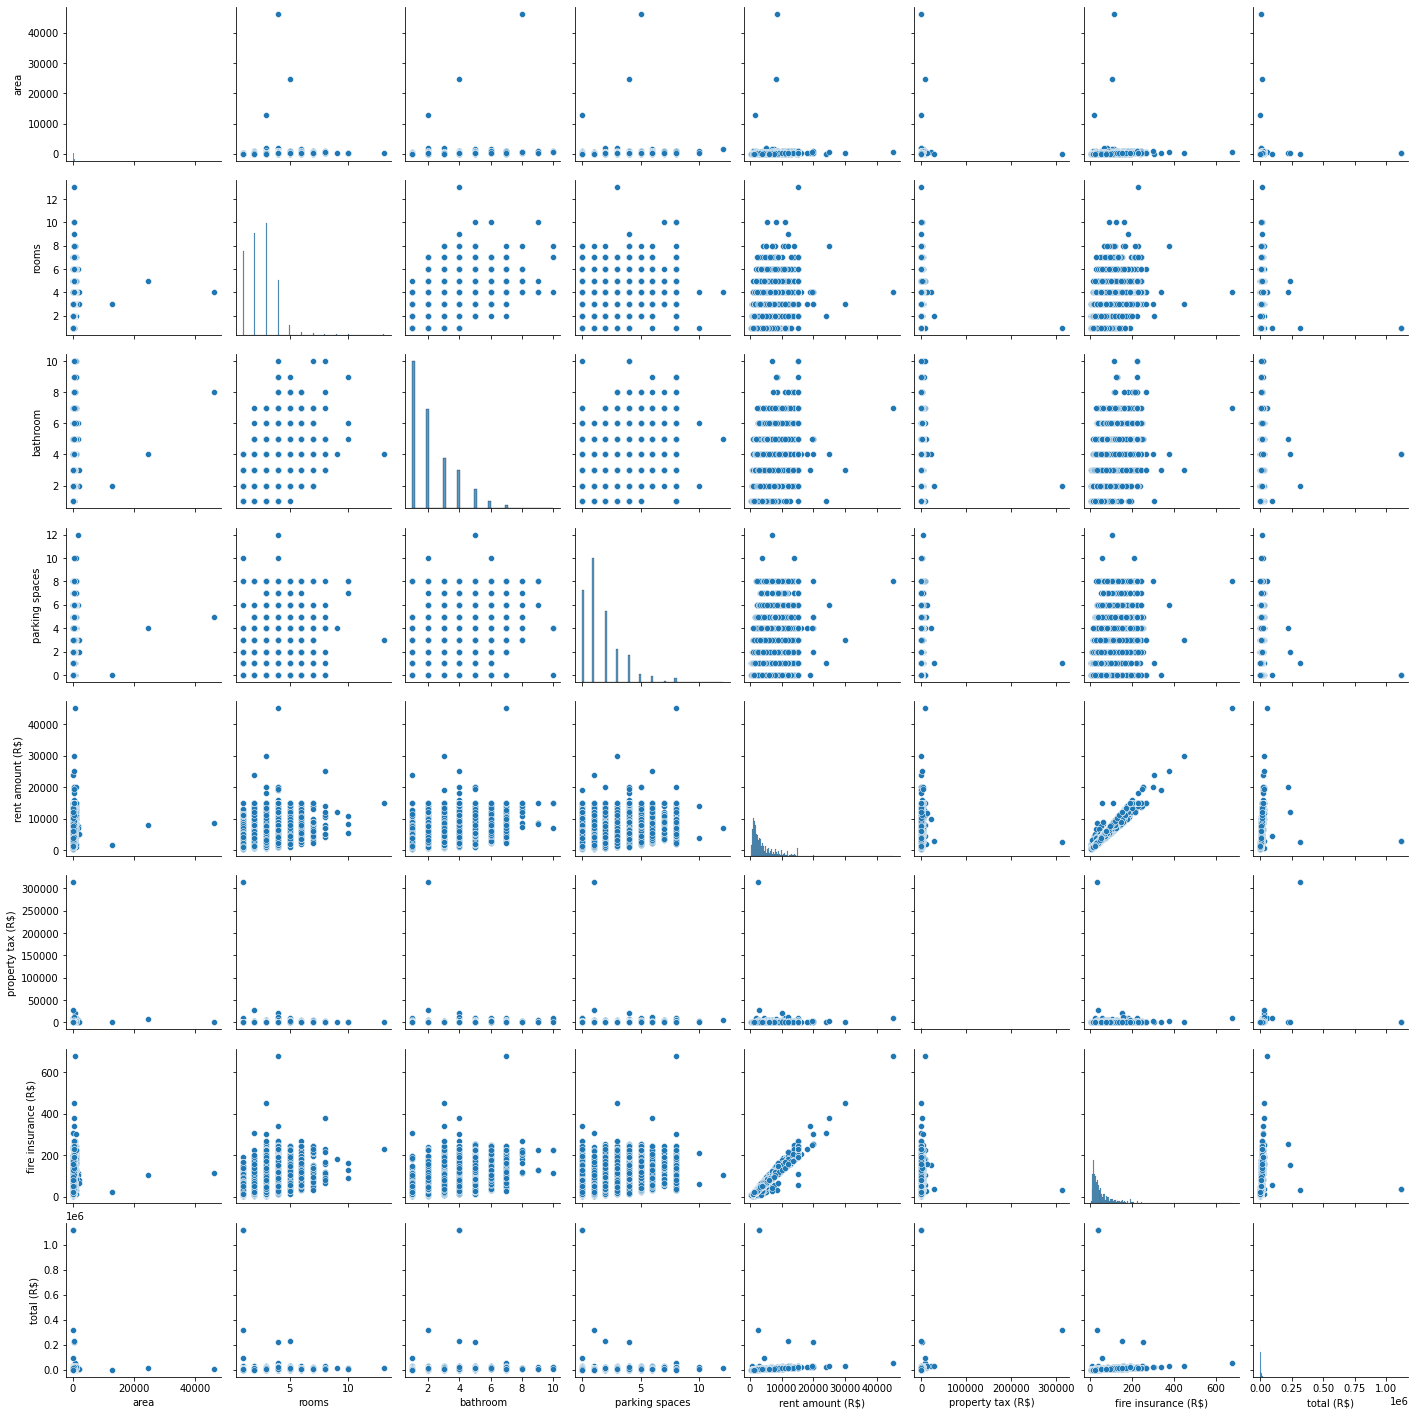

In [ ]:
sns.pairplot(house)

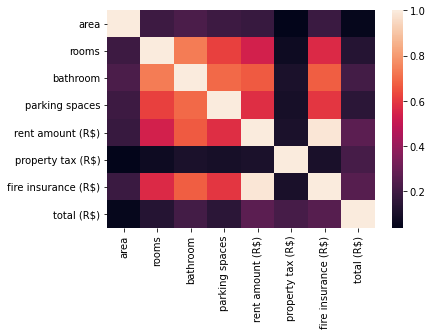

In [ ]:
sns.heatmap(house.corr())

In [ ]:
house.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'animal',
       'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)',
       'total (R$)'],
      dtype='object')

In [ ]:
X = house [['area', 'rooms', 'bathroom', 'parking spaces', 
              'rent amount (R$)',
            'property tax (R$)', 'fire insurance (R$)']]

In [ ]:
y = house ['total (R$)']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
X_train.shape[0]

6415

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

900.4496449648213


In [ ]:
print(lm.coef_)

[-9.75803694e-02 -1.10115131e+03  1.85261550e+03 -5.84337931e+02
  1.80698892e+00  1.00041077e+00 -5.84000533e+01]


In [ ]:
coefs = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])

In [ ]:
coefs

,Coefs
area,-0.097580
rooms,-1101.151309
bathroom,1852.615505
parking spaces,-584.337931
rent amount (R$),1.806989
property tax (R$),1.000411
fire insurance (R$),-58.400053


In [ ]:
predict =lm.predict(X_test)

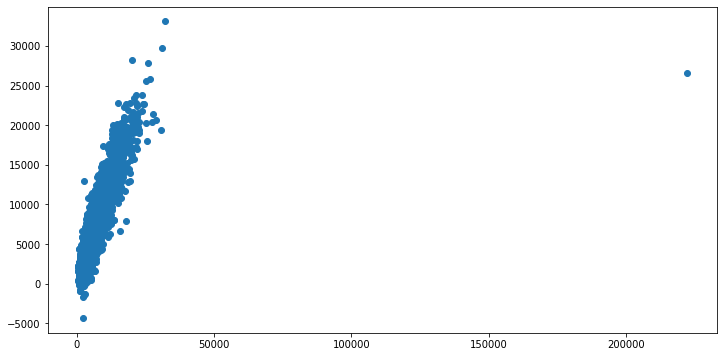

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predict)

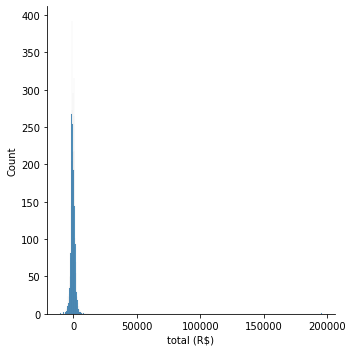

In [ ]:
sns.displot((y_test-predict))


In [ ]:
from sklearn import metrics


In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, predict))

MAE 1294.2022260347221


In [ ]:
print('MSE', metrics.mean_squared_error(y_test, predict))

MSE 11698283.631632483


In [ ]:
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))

RMSE 3420.2753736552386
